## Working with a 3D large eddy simulation of shallow convection

### The simulation

* Objective: compare a single column of a GCM with large eddy simlations for three different cloud types (stratus, stratocumulus, trade cumulus)

[GCM paper](http://ezproxy.library.ubc.ca/login?url=http://doi.wiley.com/10.1002/jame.v5.4)

[LES paper](http://ezproxy.library.ubc.ca/login?url=http://doi.wiley.com/10.1002/jame.20025)

* We started with the trade cumulus simulation, then perturbed it by raising the temperature to 300 K and 301 K.

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_ctl_s6_synthetic_albedo.mp4

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_sst_300K_synthetic_albedo.mp4

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_sst_301K_synthetic_albedo.mp4


###  The dataset  -- netccdf

[An example of reading a netCDF4 file ](http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html)


In [105]:
import glob
from netCDF4 import Dataset
from a405utils.ncdump import ncdump
the_file = glob.glob("*CTL*")[0]
with Dataset(the_file,'r') as ncin:
    ncdump(ncin)

NetCDF Global Attributes:
NetCDF dimension information:
	Name: x
		size: 384
		type: dtype('float32')
		units: 'm'
	Name: y
		size: 384
		type: dtype('float32')
		units: 'm'
	Name: z
		size: 194
		type: dtype('float32')
		units: 'm'
		long_name: 'height'
	Name: time
		size: 1
		type: dtype('float32')
		units: 'd'
		long_name: 'time'
NetCDF variable information:
	Name: p
		dimensions: ('z',)
		size: 194
		type: dtype('float32')
		units: 'mb'
		long_name: 'pressure'
	Name: U
		dimensions: ('time', 'z', 'y', 'x')
		size: 28606464
		type: dtype('float32')
		long_name: 'X Wind Component                                                                '
		units: 'm/s       '
	Name: V
		dimensions: ('time', 'z', 'y', 'x')
		size: 28606464
		type: dtype('float32')
		long_name: 'Y Wind Component                                                                '
		units: 'm/s       '
	Name: W
		dimensions: ('time', 'z', 'y', 'x')
		size: 28606464
		type: dtype('float32')
		long_name: 'Z Wind Compone

### liquid water cross section at 1 km



In [106]:
def get_var(the_file,varname):
    with Dataset(the_file) as ncin:
         out=ncin.variables[varname][...]
         x = ncin.variables['x'][...]
         y = ncin.variables['y'][...]
         z = ncin.variables['z'][...]
         out = out.squeeze()  #remove the time dimension, since we only have one timestep
    return out
qn = get_var(the_file, 'QN')

In [107]:
#
#  find the index for z = 1000 meters
#

level = np.searchsorted(z, 1000)

In [108]:
#
# get the cloud liquid water at 1000 m
#
horiz_cross_sec = qn[level,:,:]
#
# find the cross section cloud fraction
#
cloud_frac=np.sum(horiz_cross_sec > 0)/horiz_cross_sec.size
print('cloud fraction: {:5.3f}'.format(cloud_frac))

cloud fraction: 0.050


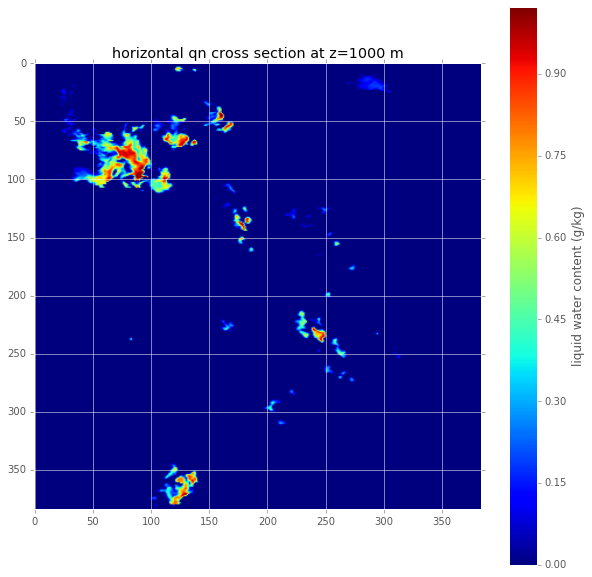

In [109]:
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import pyplot as plt
plt.close('all')
fig,ax =plt.subplots(1,1,figsize=(10,10))
whole_scene=ax.imshow(horiz_cross_sec)
cax=plt.colorbar(whole_scene,ax=ax)
cax.set_label('liquid water content (g/kg)')
title = 'horizontal qn cross section at z=1000 m'
ax.set_title(title)

### zoom in on  the top left corner

Switch from [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) to 
[pcolormesh](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolormesh) so we can orient the axes along model x,y, and z coordinates.  Note that if y is north/south (north up), then imshow plots the image upside down.

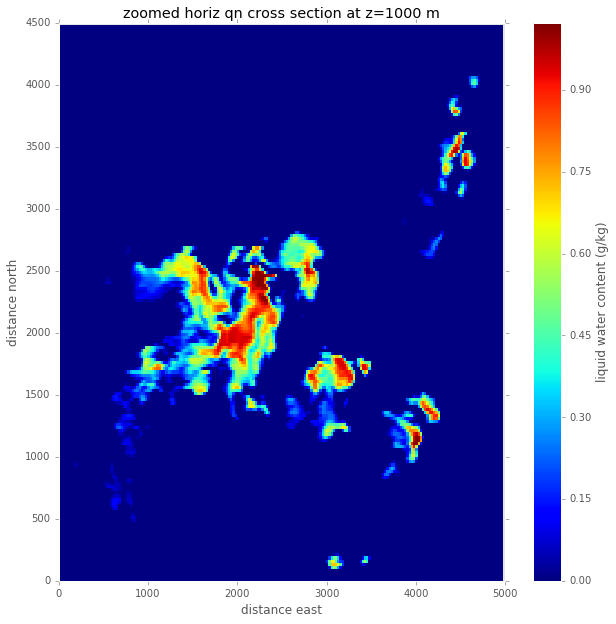

In [110]:
#
# it helps in checking your orientation to make the selection
# have different numbers of rows and columns
#
end_col = 200
end_row = 180
fig,ax =plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],y[:end_row],horiz_cross_sec[:end_row,:end_col])
ax.set(xlabel='distance east',ylabel='distance north')
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water content (g/kg)')
ax.set_title('zoomed horiz qn cross section at z=1000 m')

### Get a vertical cross section along y = 2km

In [111]:
row_number = np.searchsorted(y,2000)  #(y index of 80)

In [112]:
row_number

80

(194, 200)
194 200


[<matplotlib.text.Text at 0x11a201eb8>, <matplotlib.text.Text at 0x11a1fd860>]

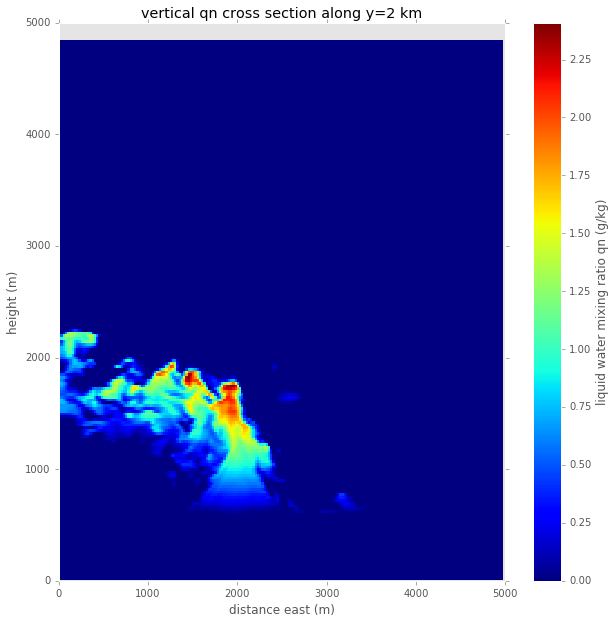

In [116]:
vert_cross_sec = qn[:,row_number,:end_col]
print(vert_cross_sec.shape)
print(len(z),len(x[:end_col]))
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water mixing ratio qn (g/kg)')
ax.set_title('vertical qn cross section along y=2 km')
ax.set(xlabel='distance east (m)',ylabel='height (m)')

### Find the vapor mixing ratio along this cross section

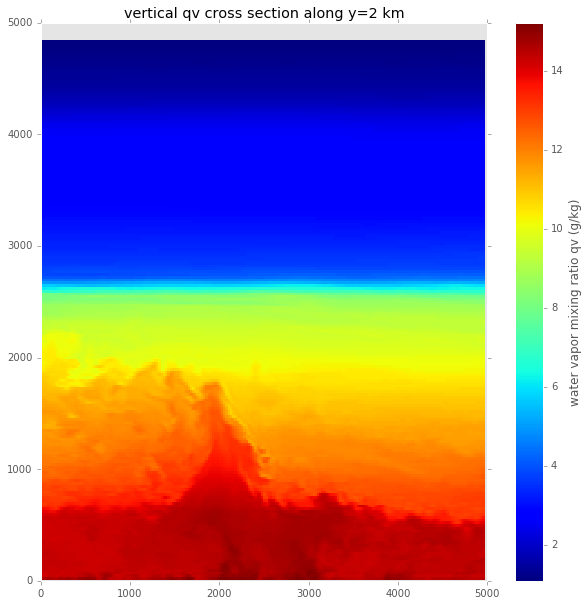

In [114]:
plt.close('all')
qv = get_var(the_file, 'QV')
vert_cross_sec = qv[:,row_number,:end_col]
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('water vapor mixing ratio qv (g/kg)')
ax.set_title('vertical qv cross section along y=2 km')

### For Monday

1\.  Read Thompkins chapter 4 parameterization notes through section 4.7.1

2\.  Read [Zhu and Randall, 1996](http://kiwi.atmos.colostate.edu/pubs/XuandRandall-semiempirical-1996.pdf)

3\.  Hand in a notebook that adds cells to cgilsI.ipynb to:

     * use pcolormesh to plot a vertical cross section of the relative humidity for along y=2 km, x= 0-5 km
     
     * use plot to plot a vertical profile of the horizontal mean RH in for this cross section as a function of height
     
     * use plot to plot a vertical profile of the horizontal standard deviation of RH as a function of height